<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
 <p></p>
 <br/>
		<div align=center>
		    <size=6>
			    <br />
Practical Assignment 4 - part 1
              <font color=blue size=6>
            	<br/>
              Naive Bayes Classifier
			</font>
    <br/>
    <br/>
 </div>
<hr/>
Artifical Intelligence - Dr. GholamReza GhassemSani
</font>
  <p></p>
 <br/>
Sharif University of Technology
<p></p>
Spring 2022


<br/>
<br/>
<font size=4 color=red>
 </font>
                <br/>
    </div>

**Due date: 19/4/1401 (at 11:59pm)**<br>
You are free to collaborate but solutions must be written up individually.
Collaborators **must** be acknowledged.<br>
Submissions with more than 100 hours delay will not be graded.<br>Submissions with less than
50 hours delay will be penalized by the following rule:<br>
**Penalized mark = M * (100 – D) / 100** <br>
Where M = the mark achieved from your solution and D is number of hours passed the
deadline. Submissions with 50 < X ≤ 100 hours delay will be penalized by P.M. = M * 0.5.<br>
Submit your answers on quera.

student_number = 98100497 

Name = Mohammad Ali 

Last_Name = Olama 

# Introduction

### In this assignment, you are going to learn about the Naive Bayes algorithm, including how it works and how to implement it from scratch on a given dataset. Hence you are not allowed to use scikit-learn for implementing NB.
### You will use the [SentiPers](https://github.com/phosseini/SentiPers) dataset for this assignment, which is a sentiment analysis corpus for Persian.
### Note that F1-Score will be used to evaluate your code.


# SentiPers Dateset

### You can download the dataset from this link:
https://github.com/phosseini/SentiPers/blob/master/data/sentipers.xlsx
### The SentiPers dataset involves polarity of some sentences. There are more than 15,500 unique sentences with polarity labels in the range of ["-2", "-1", "0", "+1", "+2"] with -2 being very negative, +2 being very positive, and 0 being neutral.
### In this step, you have to import the necessary dependencies, download the dataset and do some initial preprocessing on the dataset.


### Do not forget the following items: 

1.   Download the dataset and show some of its rows.
2.   Briefly describe the dataset. Check that if it has any Nan or duplicated values.
3.   Describe the polarity column. Show its unique values and count each one.
4.   Ignore all sentences with 0 as their polarity label. Also, assume that there are only two positive and negative classes, +1 and +2 as positive and -1 and -2 as negative.
5.   (Optional) Text preprocessing is the very first step of NLP projects. You can either implement this part, or use libraries ([hazm](https://github.com/sobhe/hazm), [parsivar](https://github.com/ICTRC/Parsivar)). Use appropriate preprocessing steps based on the dataset.
6.   Report the corpus's total number of sentences and words. Also, print the ten most seen words with their frequency.
7.   Note that the dataset is imbalanced (the positive and negative classes are not represented equally). Explain how this problem can affect the accuracy and what your solution is.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
from collections import OrderedDict
from __future__ import unicode_literals
from hazm import *
from hazm import stopwords_list

In [2]:
!git clone https://github.com/phosseini/SentiPers.git

Cloning into 'SentiPers'...


In [3]:
pip install xlrd
pip install hazm

In [4]:
df = pd.read_excel('SentiPers/data/sentipers.xlsx')
active = True

# We use 'text2' column as raw text for later use of sklearn library. We change 'text' column in the following cells to use in our handwritten naive bayes algorithm.
df['text2'] = df['text']
df


,index,sid,text,polarity,file,text2
0,0,rev-1,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,0,data/main/HP LaserJet M1132.xml,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...
1,1,rev-2,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,0,data/main/HP LaserJet M1132.xml,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...
2,2,rev-3,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,0,data/main/HP LaserJet M1132.xml,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...
3,3,rev-4,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,0,data/main/HP LaserJet M1132.xml,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...
4,4,rev-5,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,2,data/main/HP LaserJet M1132.xml,به هر صورت معمولا چیزی که بیشتر کاربران از پری...
...,...,...,...,...,...,...
15678,13286,-,البته نمی‌توان گفت که سیستم خنک کننده کاملا بی...,1,data/extra/Apple MacBook Pro With Retina Displ...,البته نمی‌توان گفت که سیستم خنک کننده کاملا بی...
15679,13290,-,باتری با وجود تمام سخت افزارهای فوق‌العاده به ...,1,data/extra/Apple MacBook Pro With Retina Displ...,باتری با وجود تمام سخت افزارهای فوق‌العاده به ...
15680,13292,-,نرم افزار به طور پیش فرض Retina MacBook Pro از...,1,data/extra/Apple MacBook Pro With Retina Displ...,نرم افزار به طور پیش فرض Retina MacBook Pro از...
15681,13295,-,متاسفانه سایر برنامه‌ها بر روی این صفحه نمایش ...,-1,data/extra/Apple MacBook Pro With Retina Displ...,متاسفانه سایر برنامه‌ها بر روی این صفحه نمایش ...


In [5]:
# TODO



# my custom functions:

def check_invalid_polarity(df1):
    b = df1[df1['polarity'] < -2]
    print("number of invalid rows with polarity value below -2 is: " , b.shape[0])
    c = df1[df1['polarity'] > +2]
    print("number of invalid rows with polarity value above +2 is: " , c.shape[0])
    pass

def remove_invalid_polarity(df1):
    check_invalid_polarity(df1)
    df1.drop(df1[df1.polarity < -2].index, inplace=True)
    df1.drop(df1[df1.polarity > +2].index, inplace=True)
    pass

def check_duplicate_text(df1):
    a = df1.text.duplicated()
#     print(a)
    b = a.value_counts()
    if b.shape == (2,):
        print("number of invalid rows with duplicated text is: " , b[1])
    else:
        print("number of invalid rows with duplicated text is: " , 0)
    return a
    pass

def remove_duplicate_text(df1):
    a1 = check_duplicate_text(df1)
    df1.drop(df1[a1].index, inplace=True)
    print("removing rows with duplicated text. now dataframe shape is: " , df1.shape )
    pass
    
def check_for_Nan_and_NA(df1):
    df2 = df1.dropna()
    print("number of invalid rows with Nan or NA values is: " , df2.shape[0] - df1.shape[0])
    df1 = df1.dropna()
    
def details():
    print("This dataset has 15683 rows and 5 columns. Each row, represents a sample. Each column represents a feature.")
    print('\t 1) \"index\": it is obvious')
    print('\t 2) \"sid\" : I do not know what it is! ')
    print('\t 3) \"text\" the main part of the dataset which is a collection of features(suppose each word in a sentence is a feature)')
    print('\t 4) \"polarity\" the label(or class) of each sample.')
    print('\t 5) \"file\" : I do not know what it is! ')
    print("This is a supervised classification problem!")
    print(50 * "*")
    
    
def polarity_column(df1):
    print(df1.polarity.value_counts())
    pass
    

def ignoe_0_polarity(df1):
    global active
    if active:
        c =  df1[df1.polarity == 0].polarity.value_counts()
        df1.drop(df1[df1.polarity == 0].index, inplace=True)
        print("removed " , c[0] , " rows with plarity == 0. Now dataframe shape is: " , df1.shape)
        active = False
    
    
    
def part5and6(df1):
    list_of_sentences = []
    list_of_words = []
    feautures_of_sentences = []
    normalizer = Normalizer()
    sentences = []
    for sent in df1.text :
        sentence = normalizer.normalize(sent)
        sentences.append(sentence)
#         sent = sentence
        l1 = sent_tokenize(sentence)
        l2 = word_tokenize(sentence)
        list_of_sentences.extend(l1)
        list_of_words.extend(l2)
        feautures_of_sentences.append(l2)
        
    dict = Counter(list_of_words)
    unique_words = list(set(list_of_words))
    sorted_dict = OrderedDict(sorted(dict.items(), key=lambda t: t[1] , reverse=True))
    
    
    
    print("total number of sentences in corpus is: " , str(len(list_of_sentences)))
    print("total number of words in corpus is: " , str(len(list_of_words)))
    print("total number of unique words in corpus is: " , str(len(unique_words)))
    print("10 most used words in the corpus are: ")
    most_wanted = list(sorted_dict.items())[:10]
    print(*most_wanted , sep = "\n")
        
    unique_words.sort()
    return list_of_sentences , list_of_words , unique_words , sorted_dict , feautures_of_sentences , sentences , most_wanted
    pass

def refine_dataset(df1 , most_wanted1):
    res = []
    for sent in df1.text :
        sent1 = sent
        for i in range(0,9):
            tr = ' ' + most_wanted1[i][0] + ' '
            sent1 = sent1.replace(tr , ' ')
        sent1 = sent1.replace('.' , '')
        sent1 = sent1.replace('،' , '')

        res.append(sent1)
    return res





# 1) show some of its rows:  It's done in previous cell.
print("1) show some of its rows:  It's done in previous cell.")


# 2) Briefly describe the dataset. Check that if it has any Nan or duplicated values.
print("2) Briefly describe the dataset. Check that if it has any Nan or duplicated values.")
details()
remove_invalid_polarity(df)
remove_duplicate_text(df)
check_for_Nan_and_NA(df)
print(100 * "-")


# 3) Describe the polarity column. Show its unique values and count each one.
print("3) Describe the polarity column. Show its unique values and count each one.")
polarity_column(df)
print(100 * "-")

# 4) Ignore all sentences with 0 as their polarity label. Also, assume that there are only two positive and negative classes, +1 and +2 as positive and -1 and -2 as negative.
print("4) Ignore all sentences with 0 as their polarity label. Also, assume that there are only two positive and negative classes, +1 and +2 as positive and -1 and -2 as negative.")
ignoe_0_polarity(df)
print("\n")

for idx in df.index:
    sample = df.at[idx , 'polarity']
    if sample == -2:
        df.at[idx , 'polarity'] = -1
    elif sample == +2:
        df.at[idx , 'polarity'] = +1
# df['polarity'] = df['polarity'].map(label_map)
display(df)

print("\n")
polarity_column(df)
print("\n")

print(100 * "-")

#  5 , 6) (Optional) Text preprocessing is the very first step of NLP projects. You can either implement this part, or use libraries (hazm, parsivar). Use appropriate preprocessing steps based on the dataset.Report the corpus's total number of sentences and words. Also, print the ten most seen words with their frequency.
print("5) (Optional) Text preprocessing is the very first step of NLP projects. You can either implement this part, or use libraries (hazm, parsivar). Use appropriate preprocessing steps based on the dataset. Report the corpus's total number of sentences and words. Also, print the ten most seen words with their frequency. \n ")
# res = refine_dataset(df)
# df['text'] = res
list_of_sentences , list_of_words , unique_words , sorted_dict, feautures_of_sentences , sentences, most_wanted = part5and6(df)
df['text'] = sentences
df['words'] = feautures_of_sentences
print(100 * "-")

print("now let's refine the dataset. as you can see, 9 out of 10 of most seen words are punctutaion or preposition. we remove all these words. \n")
res = refine_dataset(df , most_wanted)
df['text'] = res
list_of_sentences , list_of_words , unique_words , sorted_dict, feautures_of_sentences , sentences, most_wanted = part5and6(df)
print(100 * "-")
df['text'] = sentences
df['words'] = feautures_of_sentences


# 7) Note that the dataset is imbalanced (the positive and negative classes are not represented equally). Explain how this problem can affect the accuracy and what your solution is.

print("7) Note that the dataset is imbalanced (the positive and negative classes are not represented equally). Explain how this problem can affect the accuracy and what your solution is.")

print()
print("later in this notebook, you will see that almost 80% of samples belong to class +1. so with a really dumb predicator which maps every sample to class +1, we will get 80% accuracy!")



1) show some of its rows:  It's done in previous cell.
2) Briefly describe the dataset. Check that if it has any Nan or duplicated values.
This dataset has 15683 rows and 5 columns. Each row, represents a sample. Each column represents a feature.
	 1) "index": it is obvious
	 2) "sid" : I do not know what it is! 
	 3) "text" the main part of the dataset which is a collection of features(suppose each word in a sentence is a feature)
	 4) "polarity" the label(or class) of each sample.
	 5) "file" : I do not know what it is! 
This is a supervised classification problem!
**************************************************
number of invalid rows with polarity value below -2 is:  0
number of invalid rows with polarity value above +2 is:  0
number of invalid rows with duplicated text is:  2158
removing rows with duplicated text. now dataframe shape is:  (13525, 6)
number of invalid rows with Nan or NA values is:  0
-------------------------------------------------------------------------------

,index,sid,text,polarity,file,text2
4,4,rev-5,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,1,data/main/HP LaserJet M1132.xml,به هر صورت معمولا چیزی که بیشتر کاربران از پری...
6,6,rev-7,M1132 نیز پرینتری است که به نظر یکی از بهترین‌...,1,data/main/HP LaserJet M1132.xml,M1132 نیز پرینتری است که به نظر یکی از بهترین‌...
8,9,rev-10,ابعاد آن 415 x 265 x 250 میلی متر می‌باشد و وز...,1,data/main/HP LaserJet M1132.xml,ابعاد آن 415 x 265 x 250 میلی متر می‌باشد و وز...
15,16,rev-17,Hp زمان راه اندازی و Setup را با استفاده از فن...,1,data/main/HP LaserJet M1132.xml,Hp زمان راه اندازی و Setup را با استفاده از فن...
17,18,rev-19,سرعت پرینت به نوعی فوق العاده می‌باشد، به طور...,1,data/main/HP LaserJet M1132.xml,سرعت پرینت به نوعی فوق العاده می‌باشد، به طور...
...,...,...,...,...,...,...
15665,13233,-,برای جمع بندی باید بگوییم که کار کردن با این د...,1,data/extra/Apple Ipod Touch 8GB.xml,برای جمع بندی باید بگوییم که کار کردن با این د...
15666,13234,-,نه خیلی ساده، ولی با این حال لذت بخش است.,1,data/extra/Apple Ipod Touch 8GB.xml,نه خیلی ساده، ولی با این حال لذت بخش است.
15667,13235,-,بیشتر شکایت ها و ایرادهایی که ما به این دستگاه...,-1,data/extra/Apple Ipod Touch 8GB.xml,بیشتر شکایت ها و ایرادهایی که ما به این دستگاه...
15668,13236,-,ولی در کل از آن نارضایتی خاصی نداریم.,1,data/extra/Apple Ipod Touch 8GB.xml,ولی در کل از آن نارضایتی خاصی نداریم.




 1    6847
-1    1609
Name: polarity, dtype: int64


----------------------------------------------------------------------------------------------------
5) (Optional) Text preprocessing is the very first step of NLP projects. You can either implement this part, or use libraries (hazm, parsivar). Use appropriate preprocessing steps based on the dataset. Report the corpus's total number of sentences and words. Also, print the ten most seen words with their frequency. 
 
total number of sentences in corpus is:  8561
total number of words in corpus is:  198573
total number of unique words in corpus is:  12374
10 most used words in the corpus are: 
('و', 7017)
('.', 6914)
('به', 4920)
('که', 4876)
('این', 4421)
('از', 4145)
('در', 3805)
('با', 3248)
('،', 3051)
('گوشی', 2212)
----------------------------------------------------------------------------------------------------
now let's refine the dataset. as you can see, 9 out of 10 of most seen words are punctutaion or preposition. we re

# Feature Extraction

### In this step, you must extract good features from the raw text and prepare it for the Naive Bayes algorithm. A simple way is to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
### Note that extracting good and meaningful features greatly affects the model and can get you extra credit.

In [6]:
# TODO
def create_empty_dictionary(l):
    a = {k: 0 for k in l}
    return a

l2 = []
for i in range(0,df.shape[0]):
    l2.append(create_empty_dictionary(unique_words))
df['features'] = l2

df.head()

for idx in df.index:
    sample = df.loc[idx]
    for j in sample.words:
        (df.features[idx])[j] = (df.features[idx]).get(j , 0) + 1



# Naive Bayes

### Implement Naive Bayes from scratch!

In [7]:
# You can add any other function or cell.
import math

class NB:
    # TODO

    class_prob = {}
    classes = []
    mega = {}
    unit_probs = {}
    words_in_class = {}
    total_words = []
    total_unique_words = []
    
    
    def __init__(self):
        # TODO
        pass
    
    def calculate_class_prob(self, y):
        self.classes = list(set(y.polarity))
        c = y['polarity'].value_counts(normalize=True)
        print("prior probability of each class: \n" , c)
        self.class_prob = c
        pass
    
    def create_mega_documents(self, x,y):

        self.mega = {c: [] for c in self.classes}
        
        for t in x.index :
            sample = x.loc[t]
            sample_class = y['polarity'][t]
            for w in sample.words:
                (self.mega[sample_class]).append(w)
                
        for c ,v in self.mega.items():
            print("mega document for class " , str(c) , " has " , str(len(v)) , " words.")
        
        pass
    
    def calculate_unit_counts (self, x, y):
        t = list((x.iloc[0]).features.keys())
        a = {k: {} for k in t}

        b = dict.fromkeys(self.classes , 0)
        total = 0
        for c ,v in self.mega.items():
            for w in v:
                (a[w])[c] = (a[w]).get(c,0) +1
                b[c] = b.get(c,0)+1
                total += 1
                self.total_words.append(w)
        
        self.total_unique_words = list(set(self.total_words))
        print("total number of words in training data is: " , str(total))
        print("total number of unique words in training data is: " , str(len(self.total_unique_words)))
        self.words_in_class = b
        self.unit_probs = a
        pass
    
    def fit(self , x, y):
        # TODO: calculate probabilities and build the model
        self.calculate_class_prob(y)
        self.create_mega_documents(x,y)
        self.calculate_unit_counts(x,y)
        pass
    

    def predict(self , x):
        # TODO: returns a list of labels with respect to x
        result = []
        for t in x.index :
            probability = -1
            classs = 0
            for c in self.classes:
                prob = 1.0
                sample = x.loc[t]
                
                for w in sample.words:
                    q1 = (self.unit_probs[w]).get(c,0) + 1
                    q2 = self.words_in_class[c] + len(self.total_unique_words)
                    q3 = q1 / q2
                    prob = prob * q3
                prob = prob * self.class_prob[c]
                if prob > probability:
                    probability = prob
                    classs = c
            result.append(classs)
        return result
        pass
    
        


# Evaluation

### Your code will be evaluated by the F1 score. If your model predicts better than a random predictor, you will get the total score of this part. So explain what F1 score we get with a random predictor.

### After beating the random predictor, you will get extra credit for improving your model due to your F1 score.

### Use 75% of the data for the training and 25% for the testing set.

### Do not forget to report the following items:

1.   Accuracy
2.   Precision
3.   Recall
4.   Confusion Matrix
5.   F1 Score



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [9]:
# TODO: Do not forget to extract features. You can also do this step after the train-test split.

# feature extraction had been done before.

X = df[['index' , 'text' , 'text2' , 'words' , 'features']]
labels = df[['polarity']]

In [10]:
# Try not to change this cell.
x, x_test, y, y_test = train_test_split(X, labels, stratify=labels, test_size=0.25, random_state=42)

In [11]:
model = NB()
model.fit(x, y)

prior probability of each class: 
  1    0.809681
-1    0.190319
Name: polarity, dtype: float64
mega document for class  1  has  95639  words.
mega document for class  -1  has  23352  words.
total number of words in training data is:  118991
total number of unique words in training data is:  10840


In [12]:
y_pred = model.predict(x_test)



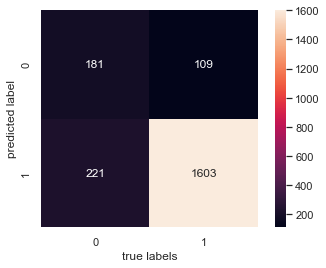

The accuracy is 0.8438978240302744
              precision    recall  f1-score   support

          -1       0.62      0.45      0.52       402
           1       0.88      0.94      0.91      1712

    accuracy                           0.84      2114
   macro avg       0.75      0.69      0.71      2114
weighted avg       0.83      0.84      0.83      2114



In [13]:
# TODO: Report metrics

mat = confusion_matrix(y_test.polarity, y_pred)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test.polarity, y_pred)))
a = classification_report(y_test.polarity, y_pred)
print(a)

# scikit-learn

### Now use Scikit-learn and compare it with your model. You can use CountVectorizer for extracting features and MultinomialNB for the NB model. Feel free to use other methods.

In [14]:
# Try not to change this cell.
x, x_test, y, y_test = train_test_split(X, labels, stratify=labels, test_size=0.25, random_state=42)


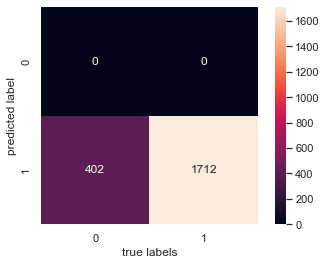

The accuracy is 0.8098391674550615
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       402
           1       0.81      1.00      0.89      1712

    accuracy                           0.81      2114
   macro avg       0.40      0.50      0.45      2114
weighted avg       0.66      0.81      0.72      2114



C:\Users\Mojtaba\anaconda3\envs\myEnv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mojtaba\anaconda3\envs\myEnv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mojtaba\anaconda3\envs\myEnv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


corpus = x.text2
labels = y.polarity
model = make_pipeline( TfidfVectorizer(), MultinomialNB())
model.fit(corpus, labels)
predicted_categories = model.predict(x_test.text2)

mat = confusion_matrix(y_test.polarity, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test.polarity, predicted_categories)))
a = classification_report(y_test.polarity, predicted_categories)
print(a)
